In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.display import display, HTML

sns.set()
%matplotlib inline

In [2]:
#OHCO = ["artist", "title","sent_num", "genre"]
OHCO = ["genre", "sent_num"]

salex_csv = 'salex_nrc.csv'
nrc_cols = "nrc_negative nrc_positive nrc_anger nrc_anticipation nrc_disgust nrc_fear nrc_joy nrc_sadness nrc_surprise nrc_trust".split()
emo = 'polarity'

In [3]:
TOKENS = pd.read_csv("TOKENS.csv").set_index(OHCO).sort_index()

In [4]:
TOKENS.head()

artist          title  token_num pos token_str term_str  \
genre   sent_num                                                               
country 0         lukebryan  kickthedustup          0  VB      kick     kick   
        0         lukebryan  kickthedustup          1  DT       the      the   
        0         lukebryan  kickthedustup          2  NN      dust     dust   
        0         lukebryan  kickthedustup          3  RP        up       up   
        0         lukebryan  kickthedustup          4  NN      cmon     cmon   

                  term_id  
genre   sent_num           
country 0            3693  
        0            6864  
        0            2104  
        0            7291  
        0            1353

## Get Lexicon

In [5]:
salex = pd.read_csv(salex_csv).set_index('term_str')
salex.columns = [col.replace('nrc_','') for col in salex.columns]

In [6]:
salex['polarity'] = salex.positive - salex.negative

## Get lexicon columns

In [7]:
emo_cols = "anger anticipation disgust fear joy sadness surprise trust polarity".split()

In [8]:
emo_cols 

['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'trust',
 'polarity']

In [9]:
TOKENS.head()

artist          title  token_num pos token_str term_str  \
genre   sent_num                                                               
country 0         lukebryan  kickthedustup          0  VB      kick     kick   
        0         lukebryan  kickthedustup          1  DT       the      the   
        0         lukebryan  kickthedustup          2  NN      dust     dust   
        0         lukebryan  kickthedustup          3  RP        up       up   
        0         lukebryan  kickthedustup          4  NN      cmon     cmon   

                  term_id  
genre   sent_num           
country 0            3693  
        0            6864  
        0            2104  
        0            7291  
        0            1353

In [10]:
TOKENS = TOKENS.join(salex, on='term_str', how='left')
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)

In [11]:
TOKENS[salex.columns].sample(10)

anger  anticipation  disgust  fear  joy  negative  \
genre     sent_num                                                      
rnbhiphop 23          0.0           0.0      0.0   0.0  0.0       NaN   
          10          0.0           0.0      0.0   0.0  0.0       NaN   
rap       10          0.0           0.0      0.0   0.0  0.0       NaN   
rnbhiphop 16          0.0           0.0      0.0   0.0  0.0       NaN   
pop       18          0.0           0.0      0.0   0.0  0.0       NaN   
rnbhiphop 45          0.0           0.0      0.0   0.0  0.0       NaN   
          22          0.0           0.0      0.0   0.0  0.0       NaN   
country   35          0.0           0.0      0.0   0.0  0.0       NaN   
rnbhiphop 83          0.0           0.0      0.0   0.0  0.0       NaN   
          74          0.0           0.0      0.0   0.0  0.0       NaN   

                    positive  sadness  surprise  trust  polarity  
genre     sent_num                                                
rnbhiphop 23             NaN      0.0       0.0    0.0       0.0  
          10             NaN      0.0       0.0    0.0       0.0  
rap       10             NaN      0.0       0.0    0.0       0.0  
rnbhiphop 16             NaN      0.0       0.0    0.0       0.0  
pop       18             NaN      0.0       0.0    0.0       0.0  
rnbhiphop 45             NaN      0.0       0.0    0.0       0.0  
          22             NaN      0.0       0.0    0.0       0.0  
country   35             NaN      0.0       0.0    0.0       0.0  
rnbhiphop 83             NaN      0.0       0.0    0.0       0.0  
          74             NaN      0.0       0.0    0.0       0.0

In [12]:
TOKENS[['term_str'] + emo_cols].sample(10)

term_str  anger  anticipation  disgust  fear  joy  sadness  \
genre     sent_num                                                              
rap       89            all    0.0           0.0      0.0   0.0  0.0      0.0   
rnbhiphop 74             to    0.0           0.0      0.0   0.0  0.0      0.0   
rap       12             on    0.0           0.0      0.0   0.0  0.0      0.0   
rnbhiphop 20              i    0.0           0.0      0.0   0.0  0.0      0.0   
rap       30         checks    0.0           0.0      0.0   0.0  0.0      0.0   
pop       12          knows    0.0           0.0      0.0   0.0  0.0      0.0   
rap       62           shed    0.0           0.0      0.0   0.0  0.0      0.0   
          70         hearts    0.0           0.0      0.0   0.0  0.0      0.0   
rnbhiphop 7            show    0.0           0.0      0.0   0.0  0.0      0.0   
rap       33              i    0.0           0.0      0.0   0.0  0.0      0.0   

                    surprise  trust  polarity  
genre     sent_num                             
rap       89             0.0    0.0       0.0  
rnbhiphop 74             0.0    0.0       0.0  
rap       12             0.0    0.0       0.0  
rnbhiphop 20             0.0    0.0       0.0  
rap       30             0.0    0.0       0.0  
pop       12             0.0    0.0       0.0  
rap       62             0.0    0.0       0.0  
          70             0.0    0.0       0.0  
rnbhiphop 7              0.0    0.0       0.0  
rap       33             0.0    0.0       0.0

In [13]:
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)

In [14]:
TOKENS.head()

artist          title  token_num pos token_str term_str  \
genre   sent_num                                                               
country 0         lukebryan  kickthedustup          0  VB      kick     kick   
        0         lukebryan  kickthedustup          1  DT       the      the   
        0         lukebryan  kickthedustup          2  NN      dust     dust   
        0         lukebryan  kickthedustup          3  RP        up       up   
        0         lukebryan  kickthedustup          4  NN      cmon     cmon   

                  term_id  anger  anticipation  disgust  fear  joy  negative  \
genre   sent_num                                                               
country 0            3693    1.0           0.0      0.0   0.0  0.0       1.0   
        0            6864    0.0           0.0      0.0   0.0  0.0       NaN   
        0            2104    0.0           0.0      0.0   0.0  0.0       NaN   
        0            7291    0.0           0.0      0.0   0.0  0.0       NaN   
        0            1353    0.0           0.0      0.0   0.0  0.0       NaN   

                  positive  sadness  surprise  trust  polarity  
genre   sent_num                                                
country 0              0.0      0.0       0.0    0.0      -1.0  
        0              NaN      0.0       0.0    0.0       0.0  
        0              NaN      0.0       0.0    0.0       0.0  
        0              NaN      0.0       0.0    0.0       0.0  
        0              NaN      0.0       0.0    0.0       0.0

# Sentiment by Genre

In [15]:
rnbhiphop = ("rnbhiphop")
country = ("country")
rap = ("rap")
pop = ("pop")

In [16]:
TOKENS.head()

artist          title  token_num pos token_str term_str  \
genre   sent_num                                                               
country 0         lukebryan  kickthedustup          0  VB      kick     kick   
        0         lukebryan  kickthedustup          1  DT       the      the   
        0         lukebryan  kickthedustup          2  NN      dust     dust   
        0         lukebryan  kickthedustup          3  RP        up       up   
        0         lukebryan  kickthedustup          4  NN      cmon     cmon   

                  term_id  anger  anticipation  disgust  fear  joy  negative  \
genre   sent_num                                                               
country 0            3693    1.0           0.0      0.0   0.0  0.0       1.0   
        0            6864    0.0           0.0      0.0   0.0  0.0       NaN   
        0            2104    0.0           0.0      0.0   0.0  0.0       NaN   
        0            7291    0.0           0.0      0.0   0.0  0.0       NaN   
        0            1353    0.0           0.0      0.0   0.0  0.0       NaN   

                  positive  sadness  surprise  trust  polarity  
genre   sent_num                                                
country 0              0.0      0.0       0.0    0.0      -1.0  
        0              NaN      0.0       0.0    0.0       0.0  
        0              NaN      0.0       0.0    0.0       0.0  
        0              NaN      0.0       0.0    0.0       0.0  
        0              NaN      0.0       0.0    0.0       0.0

In [17]:
def plot_sentiments(df):
    myfeatures = df[emo_cols].mean().sort_values().index.values.tolist()
    myfeatures.remove('polarity')
    #print(df[emo_cols].mean().sort_values())
    #print(plotpop[-4:] + ['polarity'])
    emo = myfeatures[-4:] + ['polarity']
    FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG)

In [18]:
RNBHIPHOP = TOKENS.loc[rnbhiphop].copy()
COUNTRY = TOKENS.loc[country].copy()
RAP = TOKENS.loc[rap].copy()
POP = TOKENS.loc[pop].copy()

<AxesSubplot:>

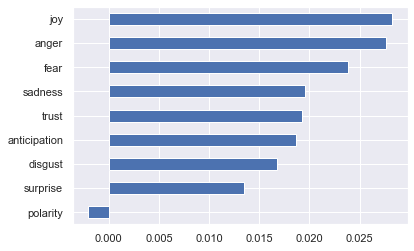

In [19]:
RNBHIPHOP[emo_cols].mean().sort_values().plot.barh()

<AxesSubplot:>

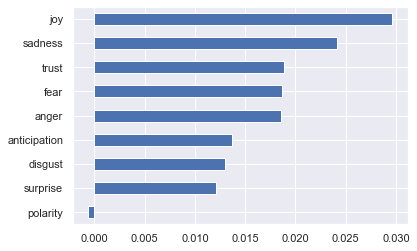

In [20]:
COUNTRY[emo_cols].mean().sort_values().plot.barh()

<AxesSubplot:>

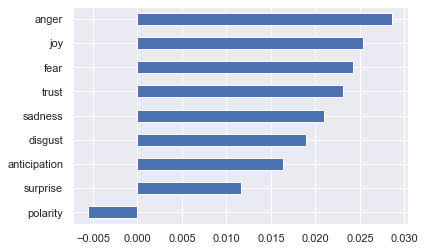

In [21]:
RAP[emo_cols].mean().sort_values().plot.barh()

<AxesSubplot:>

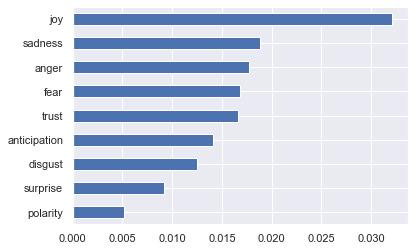

In [22]:
POP[emo_cols].mean().sort_values().plot.barh()

# Sentiment by Lyric

In [23]:
RNBHIPHOP = TOKENS.loc[rnbhiphop].copy()
COUNTRY = TOKENS.loc[country].copy()
RAP = TOKENS.loc[rap].copy()
POP = TOKENS.loc[pop].copy()

In [24]:
RNBHIPHOP.head()

,artist,title,token_num,pos,token_str,term_str,term_id,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,polarity
sent_num,,,,,,,,,,,,,,,,,,
0,richhomiequan,flex(oohoohooh),0,NN,hey,hey,3212,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
0,richhomiequan,flex(oohoohooh),1,MD,oh,oh,4732,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
0,richhomiequan,flex(oohoohooh),2,VB,there,there,6873,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
0,richhomiequan,flex(oohoohooh),3,PRP,it,it,3521,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
0,richhomiequan,flex(oohoohooh),4,VBZ,is,is,3516,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0


In [25]:
RNBHIPHOP_chaps = RNBHIPHOP.groupby("sent_num")[emo_cols].mean()
COUNTRY_chaps = COUNTRY.groupby("sent_num")[emo_cols].mean()
RAP_chaps = RAP.groupby("sent_num")[emo_cols].mean()
POP_chaps = POP.groupby("sent_num")[emo_cols].mean()

In [26]:
def plot_sentiments(df):
    myfeatures = df[emo_cols].mean().sort_values().index.values.tolist()
    myfeatures.remove('polarity')
    #print(df[emo_cols].mean().sort_values())
    #print(plotpop[-4:] + ['polarity'])
    emo = myfeatures[-4:] + ['polarity']
    FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG)

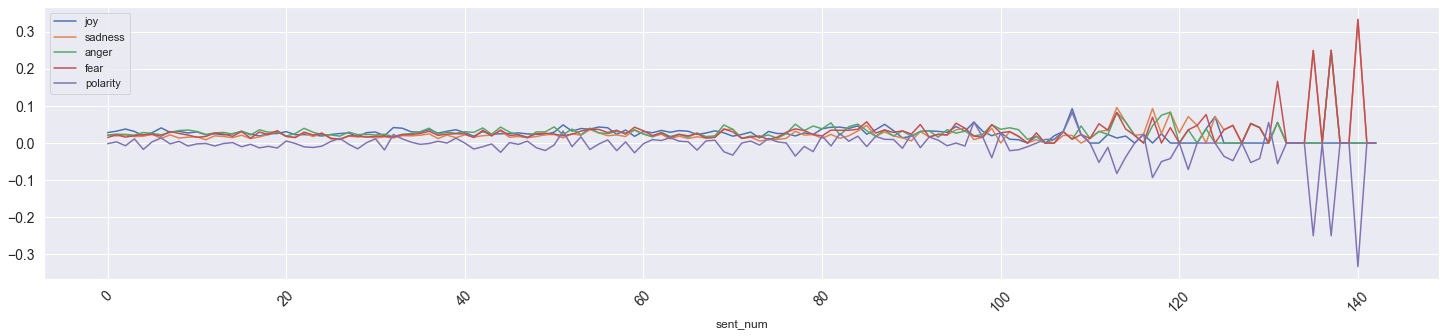

In [27]:
plot_sentiments(RNBHIPHOP_chaps)

<AxesSubplot:xlabel='sent_num'>

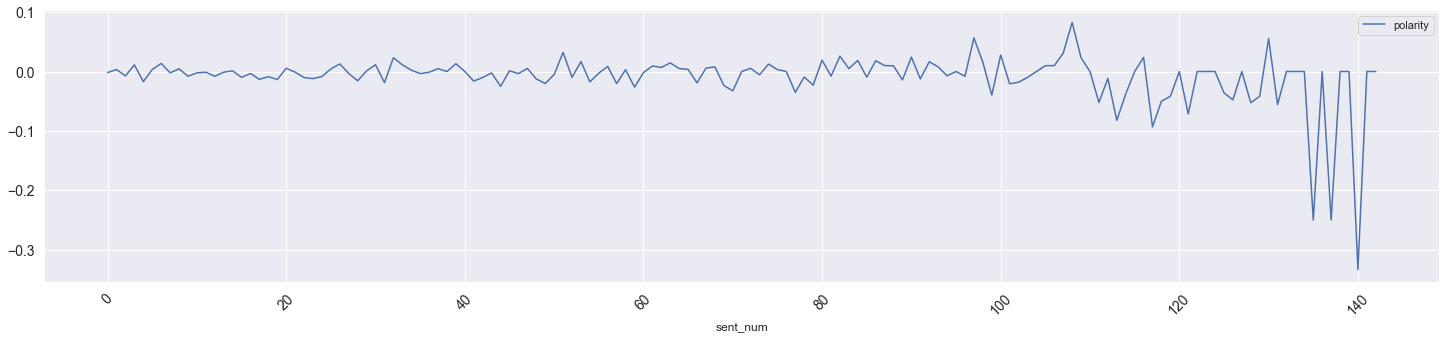

In [28]:
FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)
RNBHIPHOP_chaps[['polarity']].plot(**FIG)

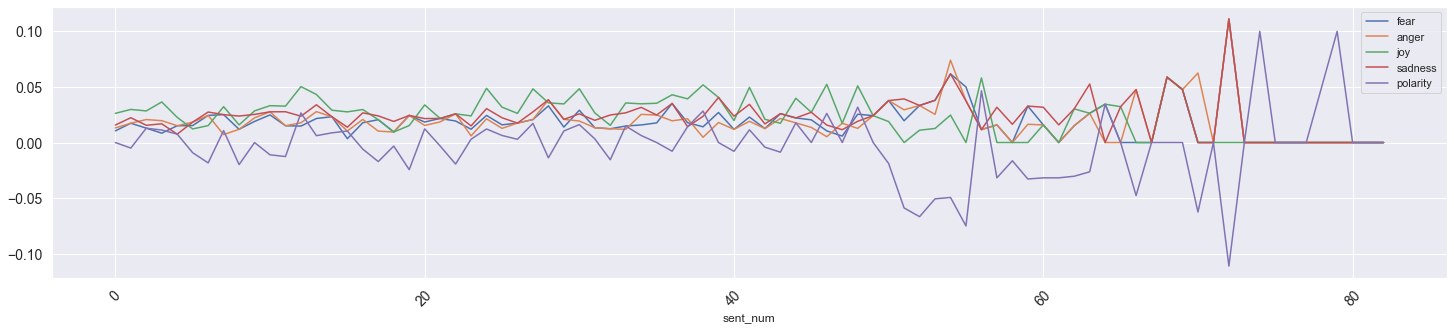

In [29]:
plot_sentiments(COUNTRY_chaps)

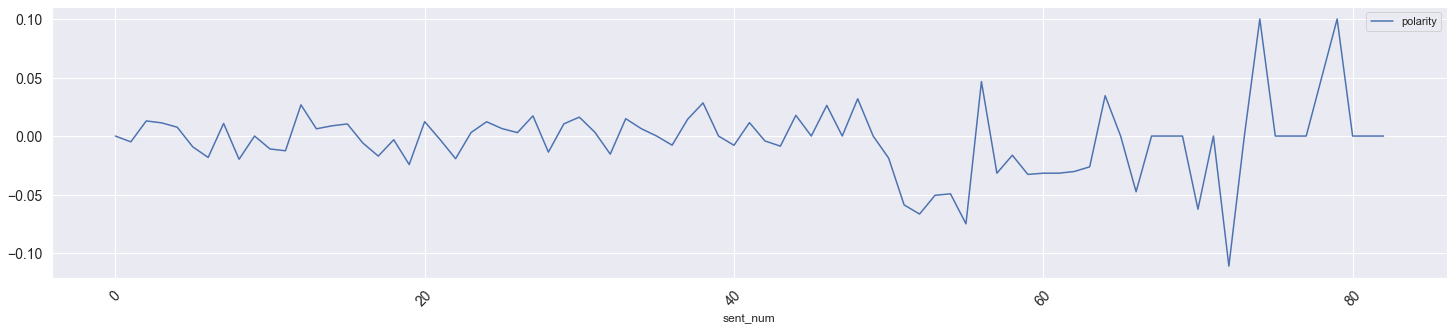

In [30]:
FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)
COUNTRY_chaps[['polarity']].plot(**FIG);

# Explore Sentiment in Lyrics

In [33]:
RNBHIPHOP['html'] =  RNBHIPHOP.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.token_str), 1)
COUNTRY['html'] =  COUNTRY.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.token_str), 1)
POP['html'] =  POP.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.token_str), 1)
RAP['html'] =  RAP.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.token_str), 1)

In [34]:
RNBHIPHOP['html'].head()

sent_num
0      <span class='sent0'>hey</span>
0       <span class='sent0'>oh</span>
0    <span class='sent0'>there</span>
0       <span class='sent0'>it</span>
0       <span class='sent0'>is</span>
Name: html, dtype: object

In [35]:
SENTS = ["artist","title","sent_num"]
RNBHIPHOP_sents = RNBHIPHOP.groupby(SENTS)[emo_cols].mean()
COUNTRY_sents = COUNTRY.groupby(SENTS)[emo_cols].mean()
POP_sents = POP.groupby(SENTS)[emo_cols].mean()
RAP_sents = RAP.groupby(SENTS)[emo_cols].mean()

In [36]:
RNBHIPHOP_sents

anger  anticipation  disgust  \
artist        title                    sent_num                                 
21savage      alot                     0           0.0           0.0      0.0   
                                       1           0.0           0.0      0.0   
                                       2           0.0           0.0      0.0   
                                       3           0.0           0.0      0.0   
                                       4           0.0           0.0      0.0   
...                                                ...           ...      ...   
zayhilfigerrr jujuonthatbeat(tzanthem) 70          0.0           0.0      0.0   
                                       71          0.0           0.0      0.0   
                                       72          0.0           0.0      0.0   
                                       73          0.0           0.0      0.5   
                                       74          0.0           0.0      0.0   

                                                 fear       joy  sadness  \
artist        title                    sent_num                            
21savage      alot                     0          0.0  0.333333      0.0   
                                       1          0.0  0.000000      0.0   
                                       2          0.0  0.000000      0.0   
                                       3          0.0  0.000000      0.0   
                                       4          0.0  0.000000      0.0   
...                                               ...       ...      ...   
zayhilfigerrr jujuonthatbeat(tzanthem) 70         0.0  0.000000      0.0   
                                       71         0.0  0.000000      0.0   
                                       72         0.0  0.272727      0.0   
                                       73         0.0  0.000000      0.0   
                                       74         0.0  0.000000      0.0   

                                                 surprise     trust  polarity  
artist        title                    sent_num                                
21savage      alot                     0              0.0  0.000000  0.333333  
                                       1              0.0  0.000000  0.000000  
                                       2              0.0  0.000000  0.000000  
                                       3              0.0  0.000000  0.000000  
                                       4              0.0  0.000000  0.000000  
...                                                   ...       ...       ...  
zayhilfigerrr jujuonthatbeat(tzanthem) 70             0.0  0.000000  0.000000  
                                       71             0.0  0.000000  0.000000  
                                       72             0.0  0.272727  0.272727  
                                       73             0.0  0.000000 -0.500000  
                                       74             0.0  0.000000  0.000000  

[7982 rows x 9 columns]

In [37]:
RNBHIPHOP_sents

anger  anticipation  disgust  \
artist        title                    sent_num                                 
21savage      alot                     0           0.0           0.0      0.0   
                                       1           0.0           0.0      0.0   
                                       2           0.0           0.0      0.0   
                                       3           0.0           0.0      0.0   
                                       4           0.0           0.0      0.0   
...                                                ...           ...      ...   
zayhilfigerrr jujuonthatbeat(tzanthem) 70          0.0           0.0      0.0   
                                       71          0.0           0.0      0.0   
                                       72          0.0           0.0      0.0   
                                       73          0.0           0.0      0.5   
                                       74          0.0           0.0      0.0   

                                                 fear       joy  sadness  \
artist        title                    sent_num                            
21savage      alot                     0          0.0  0.333333      0.0   
                                       1          0.0  0.000000      0.0   
                                       2          0.0  0.000000      0.0   
                                       3          0.0  0.000000      0.0   
                                       4          0.0  0.000000      0.0   
...                                               ...       ...      ...   
zayhilfigerrr jujuonthatbeat(tzanthem) 70         0.0  0.000000      0.0   
                                       71         0.0  0.000000      0.0   
                                       72         0.0  0.272727      0.0   
                                       73         0.0  0.000000      0.0   
                                       74         0.0  0.000000      0.0   

                                                 surprise     trust  polarity  
artist        title                    sent_num                                
21savage      alot                     0              0.0  0.000000  0.333333  
                                       1              0.0  0.000000  0.000000  
                                       2              0.0  0.000000  0.000000  
                                       3              0.0  0.000000  0.000000  
                                       4              0.0  0.000000  0.000000  
...                                                   ...       ...       ...  
zayhilfigerrr jujuonthatbeat(tzanthem) 70             0.0  0.000000  0.000000  
                                       71             0.0  0.000000  0.000000  
                                       72             0.0  0.272727  0.272727  
                                       73             0.0  0.000000 -0.500000  
                                       74             0.0  0.000000  0.000000  

[7982 rows x 9 columns]

In [38]:
RNBHIPHOP_sents['sent_str'] = RNBHIPHOP.groupby(SENTS).term_str.apply(lambda x: x.str.cat(sep=' '))
RNBHIPHOP_sents['html_str'] = RNBHIPHOP.groupby(SENTS).html.apply(lambda x: x.str.cat(sep=' '))

In [39]:
COUNTRY_sents['sent_str'] = COUNTRY.groupby(SENTS).term_str.apply(lambda x: x.str.cat(sep=' '))
COUNTRY_sents['html_str'] = COUNTRY.groupby(SENTS).html.apply(lambda x: x.str.cat(sep=' '))

In [40]:
POP_sents['sent_str'] = POP.groupby(SENTS).term_str.apply(lambda x: x.str.cat(sep=' '))
POP_sents['html_str'] = POP.groupby(SENTS).html.apply(lambda x: x.str.cat(sep=' '))

In [41]:
RAP_sents['sent_str'] = RAP.groupby(SENTS).term_str.apply(lambda x: x.str.cat(sep=' '))
RAP_sents['html_str'] = RAP.groupby(SENTS).html.apply(lambda x: x.str.cat(sep=' '))

In [42]:
def sample_sentences(df):
    rows = []
    for idx in df.sample(10).index:
        valence = round(df.loc[idx, emo], 4)     
        t = 0
        if valence > t: color = '#ccffcc'
        elif valence < t: color = '#ffcccc'
        else: color = '#f2f2f2'
        z=0
        rows.append("""<tr style="background-color:{0};padding:.5rem 1rem;font-size:110%;">
        <td>{1}</td><td>{3}</td><td width="400" style="text-align:left;">{2}</td>
        </tr>""".format(color, valence, df.loc[idx, 'html_str'], idx))

    display(HTML('<style>#sample1 td{font-size:120%;vertical-align:top;} .sent-1{color:red;font-weight:bold;} .sent1{color:green;font-weight:bold;}</style>'))
    display(HTML('<table id="sample1"><tr><th>Sentiment</th><th>ID</th><th width="600">Sentence</th></tr>'+''.join(rows)+'</table>'))

In [59]:
sample_sentences(RNBHIPHOP_sents)

Sentiment,ID,Sentence
0.0,"('lilbaby', 'emotionallyscarred', 34)",but dont listen to them haters tryna fill your ears with salt
0.0,"('cardib', 'bodakyellow(moneymoves)', 30)",ready to rain down dropped two mixtapes in six months ready to rain down dropped two mixtapes in six months
0.0,"('playboicarti', 'magnolia', 59)",hop in the bit hop in the bit what
0.0,"('blackbear', 'hotgirlbummer', 39)",out of pocket but im always in my bag
0.0833,"('omarion', 'posttobe', 43)",everything good like its posed to be ooh ah ah ah ah
-0.0909,"('aboogiewitdahoodie', 'drowning', 40)",im the shit im fartin i dont know how to potty
-0.1111,"('xxxtentacion', 'sad!', 32)",suicide if you ever try to let go uh
0.0,"('djkhaled', 'nobrainer', 14)",put em high
0.0,"('justintimberlake', 'saysomething', 35)",maybe im looking for something i cant have maybe im looking for something i cant have
0.0,"('florida', 'myhouse', 25)",close the blinds lets pretend that the time has changed


In [44]:
sample_sentences(COUNTRY_sents)

Sentiment,ID,Sentence
0.0,"('dustinlynch', 'smalltownboy', 48)",lets turn it up to ten girl
0.0,"('morganwallen', 'chasinyou', 24)",im just on your radio
0.0,"('floridageorgialine', 'talkyououtofit', 31)",now i just wanna talk you out of it
0.0,"('dan+shay', 'alltomyself', 22)",i want you all to myself
0.0,"('littlebigtown', 'girlcrush', 13)",the way that shes whisperin the way that shes pullin you in
0.0,"('lukecombs', 'eventhoughimleaving', 2)",daddy please dont go i dont wanna be alone
0.0,"('kanebrown', 'homesick', 19)",on a sign with a line out the door
-0.0909,"('floridageorgialine', 'simple', 11)",aint no need to complicate it we both know thats overrated
0.0,"('lukecombs', 'doestome', 59)",but it does to me
-0.125,"('mirandalambert', 'bluebird', 19)",ill keep a light on in my soul


In [58]:
sample_sentences(POP_sents)

Sentiment,ID,Sentence
0.0,"('justinbieber', 'sorry', 15)",im sorry yeah
0.0,"('arianagrande', 'thankunext', 4)",even almost got married
-0.1667,"('justinbieber', 'yummy', 36)",lost control of myself im compromised
0.0,"('nickjonas', 'chains', 2)",i gave her my heart but she wanted my soul
0.0,"('elliegoulding', 'onmymind', 50)",why i got you on my mind
0.0,"('arianagrande', 'notearslefttocry', 12)",aint got no tears in my body
0.0,"('shawnmendes', 'theresnothingholdinmeback', 2)",i wanna let her take control
0.125,"('samsmith', 'dancingwithastranger', 33)",ooh baby baby im dancing with a stranger
0.0909,"('daya', 'hideaway', 42)",where do the good boys go to hide away hide away
0.0,"('maroon5', 'animals', 64)",yeah yeah yeah


In [57]:
sample_sentences(RAP_sents)

Sentiment,ID,Sentence
0.0,"('postmalone', 'congratulations', 9)",now they always say congratulations uh uh uh
-0.25,"('postmalone', 'ifallapart', 0)",ooh i fall apart
0.0,"('nickiminaj', 'only', 67)",whoever is hittin aint hittin it right
0.0,"('drake', 'laughnowcrylater', 34)",so i bet they on they face right now
-0.3333,"('drake', 'toogood', 2)",still missing you
0.0,"('kendricklamar', 'dna.', 52)",you mothafuckas cant tell me nothin
0.1667,"('childishgambino', 'thisisamerica', 16)",dance and shake the frame yeah
-0.1818,"('migos', 'badandboujee', 12)",call up the gang and they come and get ya gang
0.0,"('g-eazy', 'nolimit', 23)",got the city on fire
0.0909,"('yg', 'bigbank', 34)",now im lookin for a glove with the sparkle on it


# VADER

In [45]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [46]:
RNBHIPHOP_vader_cols = RNBHIPHOP_sents.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))
RNBHIPHOP_vader = pd.concat([RNBHIPHOP_sents, RNBHIPHOP_vader_cols], axis=1)

In [47]:
# RNBHIPHOP_vader.head()

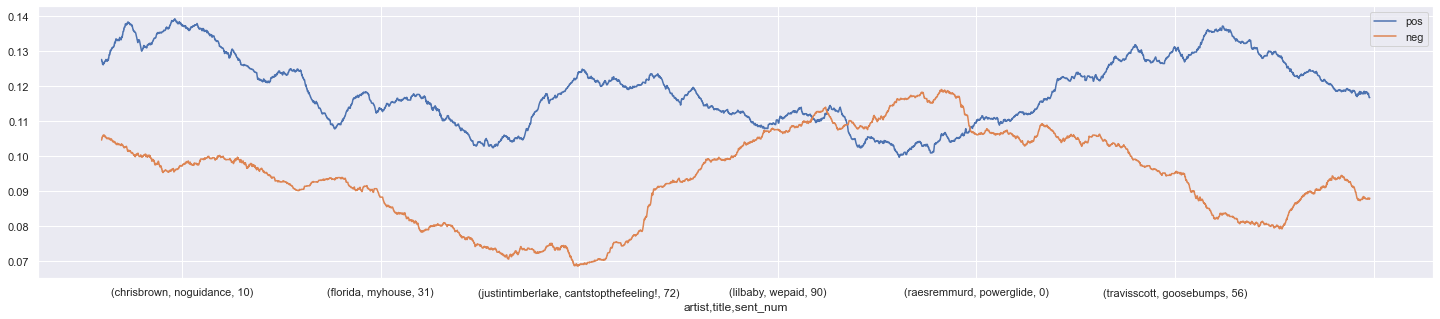

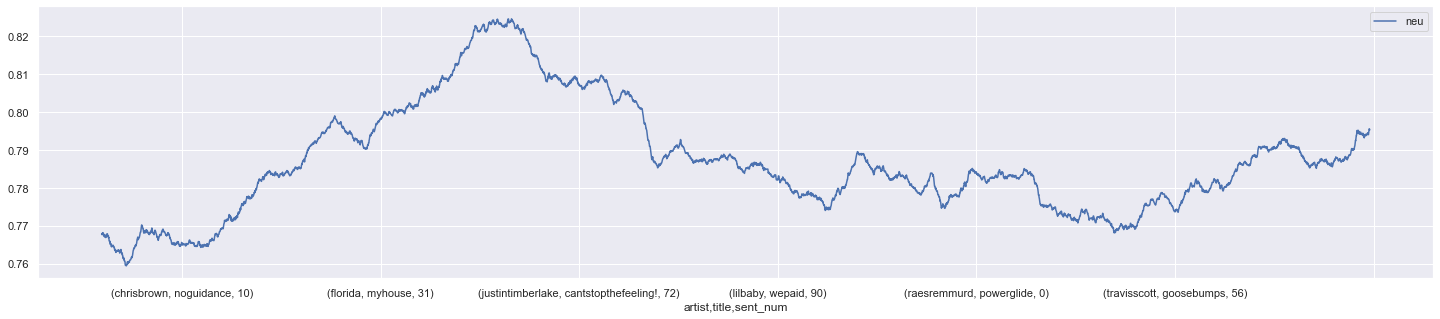

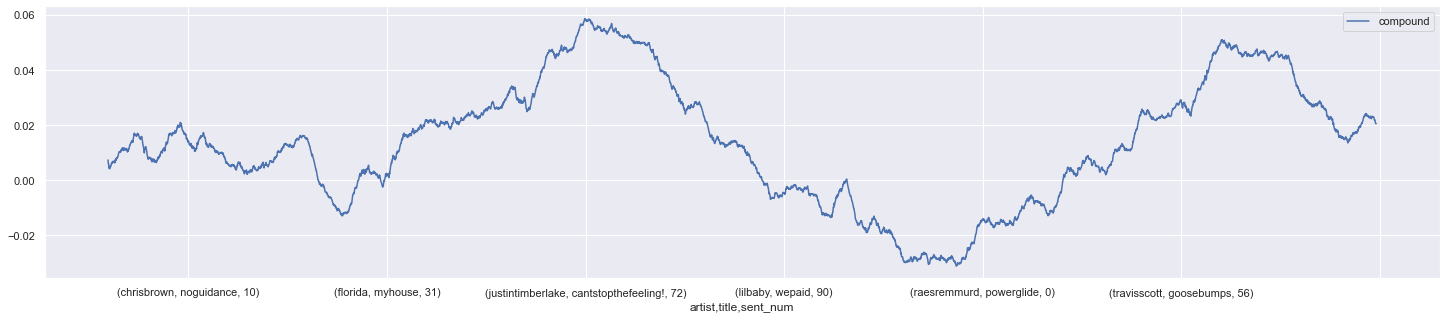

In [53]:
w = int(RNBHIPHOP_vader.shape[0] / 5)
RNBHIPHOP_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5));
RNBHIPHOP_vader[['neu']].rolling(w).mean().plot(figsize=(25,5));
RNBHIPHOP_vader[['compound']].rolling(w).mean().plot(figsize=(25,5));

In [49]:
COUNTRY_vader_cols = COUNTRY_sents.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))
COUNTRY_vader = pd.concat([COUNTRY_sents, COUNTRY_vader_cols], axis=1)

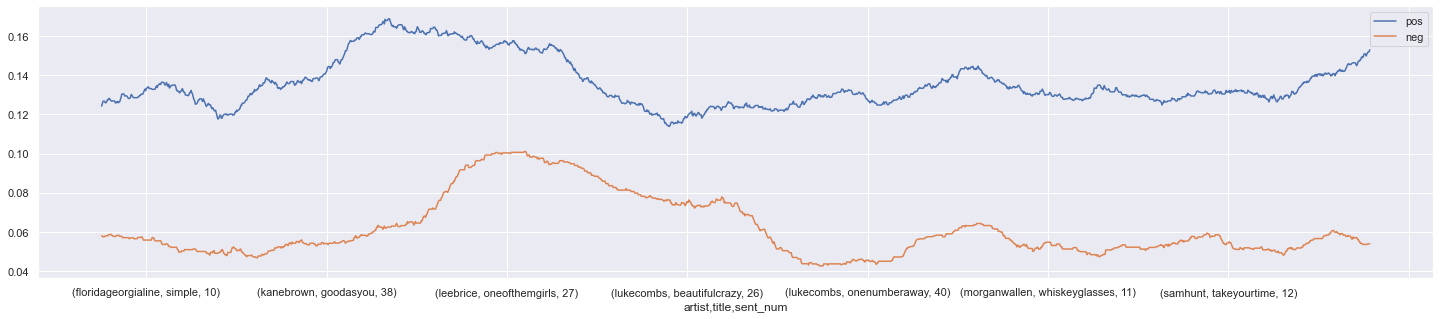

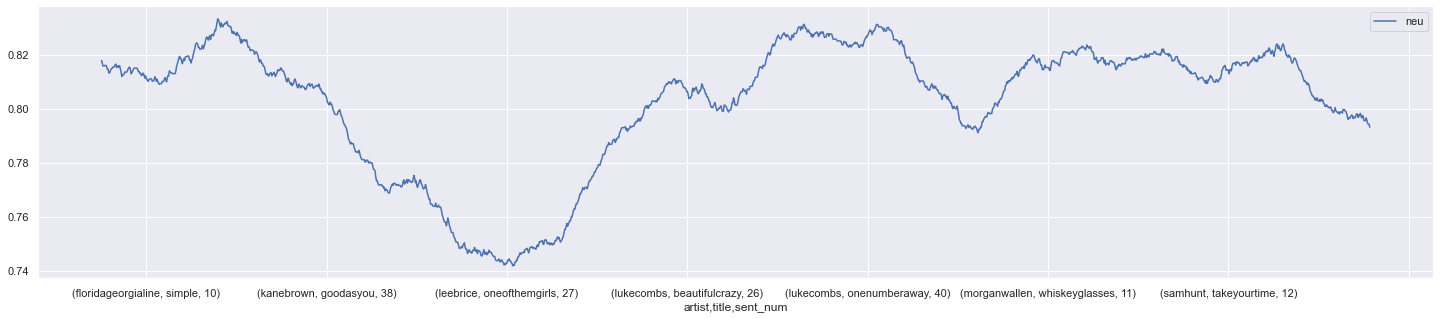

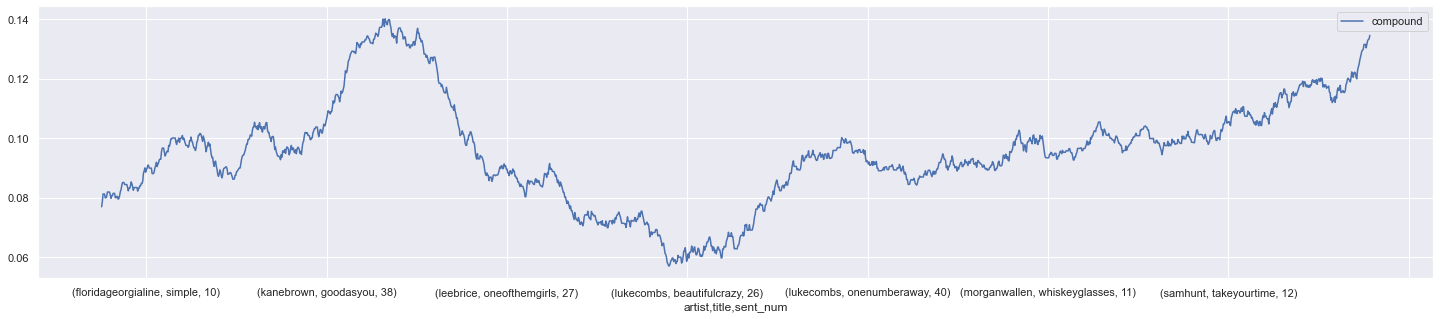

In [56]:
w = int(COUNTRY_vader.shape[0] / 5)
COUNTRY_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5));
COUNTRY_vader[['neu']].rolling(w).mean().plot(figsize=(25,5));
COUNTRY_vader[['compound']].rolling(w).mean().plot(figsize=(25,5));